тип данных OrderedDict

Историческая справка

В Python 3.6 словари (тип dict) были переработаны так, чтобы повысилась их производительность. Следствием такой переработки явился один очень интересный побочный эффект — словари стали упорядоченными, то есть стали сохранять порядок вставки элементов, хотя на тот момент официально этот порядок не гарантировался. «Официально не гарантируется» означает, что это была просто деталь реализации, которая могла быть изменена в будущих версиях Python. Но начиная с Python 3.7, в спецификации языка гарантируется сохранение порядка вставки элементов в словарь.

После переработки тип dict стал использовать на 20-25% меньше памяти.

В далеком 2008 году, задолго до переработки устройства словарей в рамках релиза Python 3.1 в стандартную библиотеку был добавлен тип OrderedDict, который на тот момент решал проблему неупорядоченности обычных словарей (тип dict).

Тип данных OrderedDict

Тип OrderedDict является подтипом типа dict, сохраняющий порядок, в котором пары "ключ-значение" вставляются в словарь. Когда мы перебираем объект типа OrderedDict, его элементы перебираются в исходном порядке. Если мы обновим значение существующего ключа, то порядок останется неизменным. Если мы удалим элемент и вставим его снова, то этот элемент будет добавлен в конец словаря.

Тип OrderedDict будучи подтипом dict наследует все методы, предоставляемые обычным словарем. При этом в OrderedDict также есть дополнительные методы, о которых мы поговорим ниже.

В отличие от dict, тип OrderedDict не является встроенным типом и для использования его необходимо импортировать из модуля collections.

In [1]:
from collections import OrderedDict

numbers = OrderedDict()

numbers['one'] = 1
numbers['two'] = 2
numbers['three'] = 3

print(numbers)

OrderedDict({'one': 1, 'two': 2, 'three': 3})


Как и defaultdict, эти словари можно создавать любым из доступных способов, как и обычные словари:

In [2]:
from collections import OrderedDict

numbers1 = OrderedDict({'one': 1, 'two': 2, 'three': 3})
numbers2 = OrderedDict([('one', 1), ('two', 2), ('three', 3)])
numbers3 = OrderedDict(one=1, two=2, three=3)

Изменение OrderedDict словаря

Тип OrderedDict является изменяемым. Мы можем вставлять новые элементы, обновлять и удалять существующие элементы. Если мы вставим новый элемент в существующий OrderedDict словарь, то этот элемент добавится в конец словаря.

In [6]:
from collections import OrderedDict

numbers = OrderedDict(one=1, two=2, three=3)

print(numbers)
print(id(numbers))

numbers['four'] = 4

print(numbers)
print(id(numbers))

OrderedDict({'one': 1, 'two': 2, 'three': 3})
2144881024192
OrderedDict({'one': 1, 'two': 2, 'three': 3, 'four': 4})
2144881024192


Если мы удалим элемент из существующего OrderedDict словаря и снова вставим его, то он будет помещен в конец словаря.

In [7]:
from collections import OrderedDict

numbers = OrderedDict(one=1, two=2, three=3)
print(numbers)

del numbers['one']

print(numbers)
numbers['one'] = 1
print(numbers)

OrderedDict({'one': 1, 'two': 2, 'three': 3})
OrderedDict({'two': 2, 'three': 3})
OrderedDict({'two': 2, 'three': 3, 'one': 1})


Если мы обновляем значение по существующему ключу, то ключ сохраняет свою позицию.

In [8]:
from collections import OrderedDict

numbers = OrderedDict(one=1, two=2, three=3)
print(numbers)

numbers['one'] = 1.0
print(numbers)

numbers.update(two=2.0)
print(numbers)

OrderedDict({'one': 1, 'two': 2, 'three': 3})
OrderedDict({'one': 1.0, 'two': 2, 'three': 3})
OrderedDict({'one': 1.0, 'two': 2.0, 'three': 3})


Обновить значение по нужному ключу можно либо с помощью квадратных скобок, либо с помощью словарного метода update().

Итерирование по OrderedDict словарю

Доступ к элементам и итерирование по OrderedDict словарям работает так же, как и у обычных словарей. Мы можем перебирать ключи напрямую или можем использовать словарные методы items(), keys() и values().

In [9]:
from collections import OrderedDict

numbers = OrderedDict(one=1, two=2, three=3)

# обращение по ключу
print(numbers['one'])
print(numbers['three'])

print()

# перебор ключей напрямую
for key in numbers:
    print(key, '->', numbers[key])

print()

# перебор пар (ключ, значение) через метод
for key, value in numbers.items():
    print(key, '->', value)

print()

# перебор ключей через метод
for key in numbers.keys():
    print(key, '->', numbers[key])

print()

# перебор значений через метод
for value in numbers.values():
    print(value)

1
3

one -> 1
two -> 2
three -> 3

one -> 1
two -> 2
three -> 3

one -> 1
two -> 2
three -> 3

1
2
3


При итерировании по OrderedDict словарям мы можем использовать встроенную функцию reversed().

In [10]:
from collections import OrderedDict

numbers = OrderedDict(one=1, two=2, three=3)

# перебор ключей напрямую
for key in reversed(numbers):
    print(key, '->', numbers[key])

print()

# перебор пар (ключ, значение) через метод
for key, value in reversed(numbers.items()):
    print(key, '->', value)

print()

# перебор ключей через метод
for key in reversed(numbers.keys()):
    print(key, '->', numbers[key])

print()

# перебор значений через метод
for value in reversed(numbers.values()):
    print(value)

three -> 3
two -> 2
one -> 1

three -> 3
two -> 2
one -> 1

three -> 3
two -> 2
one -> 1

3
2
1


Обычные словари (тип dict) начиная с Python 3.8 также поддерживают использование встроенной функции reversed()

Методы popitem() и move_to_end()

OrderedDict словари имеют два полезных метода:

метод move_to_end() позволяет переместить существующий элемент либо в конец, либо в начало словаря
метод popitem() позволяет удалить и вернуть элемент либо из конца, либо из начала словаря

Метод move_to_end()

Методу move_to_end() можно передать два аргумента:

key (обязательный аргумент) – ключ, который идентифицирует перемещаемый элемент

last (необязательный аргумент) – логическое значение (тип bool), которое определяет, в какой конец словаря мы перемещаем элемент, значение True (по умолчанию) перемещает элемент в конец, значение False – в начало

Если при вызове метода move_to_end() переданный ключ отсутствует в словаре, то возникает ошибка KeyError.

In [11]:
from collections import OrderedDict

numbers = OrderedDict(one=1, two=2, three=3)
print(numbers)

numbers.move_to_end('one')  # last=True
print(numbers)

numbers.move_to_end('three', last=False)  # last=False
print(numbers)

OrderedDict({'one': 1, 'two': 2, 'three': 3})
OrderedDict({'two': 2, 'three': 3, 'one': 1})
OrderedDict({'three': 3, 'two': 2, 'one': 1})


С помощью метода move_to_end() мы можем сортировать OrderedDict словарь по ключам.

In [13]:
from collections import OrderedDict

letters = OrderedDict(b=2, d=4, a=1, c=3)
print(letters)
print(sorted(letters))

for key in sorted(letters):
    letters.move_to_end(key)

print(letters)

OrderedDict({'b': 2, 'd': 4, 'a': 1, 'c': 3})
['a', 'b', 'c', 'd']
OrderedDict({'a': 1, 'b': 2, 'c': 3, 'd': 4})


Метод popitem()

Метод popitem() по умолчанию удаляет и возвращает элемент в порядке LIFO (Last-In/First-Out, последний пришел/первый ушел). Другими словами, метод popitem() удаляет элементы с конца словаря.

In [14]:
from collections import OrderedDict

numbers = OrderedDict(one=1, two=2, three=3)

print(numbers.popitem())
print(numbers)

print(numbers.popitem())
print(numbers)

('three', 3)
OrderedDict({'one': 1, 'two': 2})
('two', 2)
OrderedDict({'one': 1})


Если методу popitem() передать необязательный аргумент last=False, то он начнет удалять и возвращать элементы в порядке FIFO (First-In/First-Out, первый пришел/первый ушел).

In [15]:
from collections import OrderedDict

numbers = OrderedDict(one=1, two=2, three=3)

print(numbers.popitem(last=False))
print(numbers)

print(numbers.popitem(last=False))
print(numbers)

('one', 1)
OrderedDict({'two': 2, 'three': 3})
('two', 2)
OrderedDict({'three': 3})


Сравнение словарей

При сравнении на равенство обычных словарей (тип dict) порядок расположения их элементов неважен.

In [16]:
letters1 = dict(a=1, b=2, c=3, d=4)
letters2 = {'b': 2, 'a': 1, 'c': 3, 'd': 4}
letters3 = dict([('a', 1), ('b', 2), ('c', 3), ('d', 4)])

print(letters1 == letters2)
print(letters1 == letters3)

True
True


При сравнение на равенство OrderedDict словарей порядок расположения их элементов важен.

In [17]:
from collections import OrderedDict

letters1 = OrderedDict(a=1, b=2, c=3, d=4)
letters2 = OrderedDict({'b': 2, 'a': 1, 'c': 3, 'd': 4})
letters3 = OrderedDict([('a', 1), ('b', 2), ('c', 3), ('d', 4)])

print(letters1 == letters2)
print(letters1 == letters3)

False
True


При сравнении на равенство обычного словаря (тип dict) и OrderedDict словаря порядок расположения их элементов неважен.

In [18]:
from collections import OrderedDict

letters1 = OrderedDict(a=1, b=2, c=3, d=4)
letters2 = {'b': 2, 'a': 1, 'c': 3, 'd': 4}

print(letters1 == letters2)

True


Примечания

 Мы можем использовать метод fromkeys() для создания OrderedDict словарей.

In [19]:
from collections import OrderedDict

keys = ['one', 'two', 'three']
numbers = OrderedDict.fromkeys(keys, 0)
print(numbers)

OrderedDict({'one': 0, 'two': 0, 'three': 0})


В Python 3.9 появились операторы | и |= которые реализуют операцию конкатенации словарей, как обычных, так и OrderedDict

In [20]:
from collections import OrderedDict

physicists = OrderedDict(newton='1642-1726', einstein='1879-1955')
biologists = OrderedDict(darwin='1809-1882', mendel='1822-1884')

scientists = physicists | biologists
print(scientists)

OrderedDict({'newton': '1642-1726', 'einstein': '1879-1955', 'darwin': '1809-1882', 'mendel': '1822-1884'})


In [21]:
from collections import OrderedDict

physicists = OrderedDict(newton='1642-1726', einstein='1879-1955')
physicists1 = OrderedDict(newton='1642-1726/1727', hawking='1942-2018')

physicists |= physicists1

print(physicists)

OrderedDict({'newton': '1642-1726/1727', 'einstein': '1879-1955', 'hawking': '1942-2018'})


Примечание 6. Тип данных OrderedDict написан на языке C и реализован в виде двусвязного списка для сохранения порядка элементов.

Примечание 7. Тип данных OrderedDict проигрывает типу dict по производительности:

примерно на 40% медленнее
примерно на 50% занимает больше памяти

Примечание 8. OrderedDict словари содержат дополнительный атрибут __dict__, которого нет у обычного словаря. Данный атрибут используется для динамического наделения объектов дополнительным функционалом.

In [22]:
from collections import OrderedDict

letters = OrderedDict(b=2, d=4, a=1, c=3)
print(letters)
print(letters.__dict__)

letters.__dict__['advanced'] = '144'
print(letters)
print(letters.__dict__)

OrderedDict({'b': 2, 'd': 4, 'a': 1, 'c': 3})
{}
OrderedDict({'b': 2, 'd': 4, 'a': 1, 'c': 3})
{'advanced': '144'}


In [23]:
letters = dict(b=2, d=4, a=1, c=3)

print(letters.__dict__)  # у обычных словарей нет атрибута __dict__

AttributeError: 'dict' object has no attribute '__dict__'

Для динамического задания новых атрибутов мы можем использовать два синтаксиса:

в стиле словаря: ordered_dict.__dict__['attr'] = value
через точечную нотацию: ordered_dict.attr = value

In [24]:
from collections import OrderedDict

letters = OrderedDict(b=2, d=4, a=1, c=3)

letters.sorted_keys = lambda: sorted(letters.keys())

print(letters)
print(letters.sorted_keys())

letters['e'] = 5
print(letters)
print(letters.sorted_keys())

for key in letters.sorted_keys():
    print(key, '->', letters[key])

OrderedDict({'b': 2, 'd': 4, 'a': 1, 'c': 3})
['a', 'b', 'c', 'd']
OrderedDict({'b': 2, 'd': 4, 'a': 1, 'c': 3, 'e': 5})
['a', 'b', 'c', 'd', 'e']
a -> 1
b -> 2
c -> 3
d -> 4
e -> 5


Таким образом, мы наделили  OrderedDict словарь (переменная letters) дополнительным методом (атрибутом) sorted_keys(), который возвращает список упорядоченных ключей.

Различия и особенности типов dict и OrderedDict отражены в таблице:

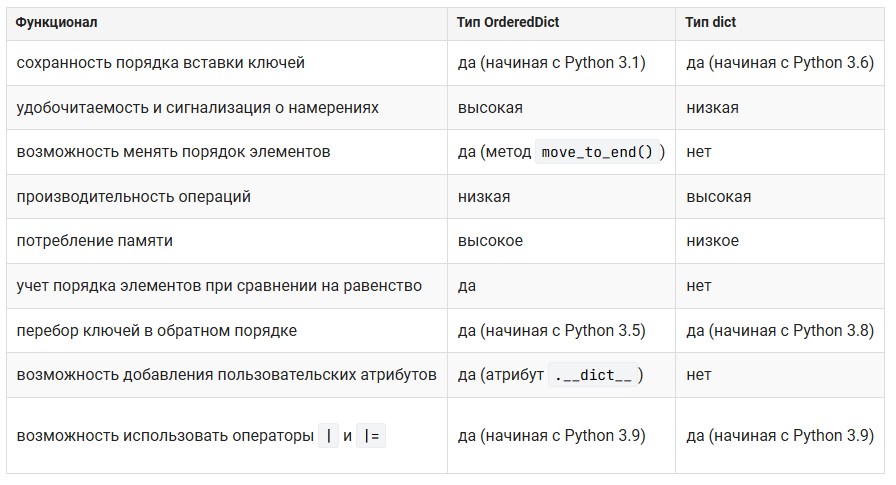

In [25]:
from functions import picture

picture('fffБез имени.png')

Примечание 11. С релизом Python 3.12 тип OrderedDict был обновлен. Так в новой версии языка объект типа OrderedDict получил новое строковое представление.

In [26]:
from collections import OrderedDict

numbers = OrderedDict()

numbers['one'] = 1
numbers['two'] = 2
numbers['three'] = 3

print(numbers)

OrderedDict({'one': 1, 'two': 2, 'three': 3})


In [ ]:
OrderedDict()
OrderedDict(name='Timur', surname='Guev', hobby='math')
OrderedDict({'name': 'Timur', 'surname': 'Guev', 'hobby': 'math'})
OrderedDict((['name', 'Timur'], ['surname', 'Guev'], ['hobby', 'math']))
OrderedDict(int, {'name': 'Timur', 'surname': 'Guev', 'hobby': 'math'})
OrderedDict.fromkeys(('name', 'surname', 'hobby'), 'Empty')

In [27]:
from collections import OrderedDict

data = OrderedDict(key1='value1')

data['key2'] = 'value2'
data['key3'] = 'value3'

for key, value in data.items():
    print(f'{key} -> {value}')

key1 -> value1
key2 -> value2
key3 -> value3


In [28]:
from collections import OrderedDict

cloth = OrderedDict({'name': 'pants', 'size': 'm', 'color': 'grey'})

cloth['name'] = 'shirt'
cloth.update(size='s')

for key, value in cloth.items():
    print(f'{key}: {value}')

name: shirt
size: s
color: grey


In [29]:
country1 = dict(name='Finland', capital='Helsinki', currency='euro')
country2 = dict(capital='Helsinki', name='Finland', currency='euro')

print(country1 == country2)

True


In [30]:
from collections import OrderedDict

country1 = OrderedDict(name='Finland', capital='Helsinki', currency='euro')
country2 = OrderedDict(name='Finland', capital='Helsinki', currency='euro')

country2.move_to_end('name')

print(country1 == country2)

False


In [31]:
from collections import OrderedDict

country1 = dict(name='Finland', capital='Helsinki', currency='euro')
country2 = OrderedDict(currency='euro', capital='Helsinki', name='Finland')

print(country1 == country2)

True


In [32]:
from collections import OrderedDict

planets1 = OrderedDict(Mercury=None, Venues=2, Earth=None, Mars=4, Jupiter=5)
planets2 = OrderedDict(Mercury=1, Saturn=6, Uranus=7, Neptune=8, Earth=3)

solar_system = planets1 | planets2

print(*solar_system)

Mercury Venues Earth Mars Jupiter Saturn Uranus Neptune


In [33]:
from collections import OrderedDict

flower = OrderedDict([('name', 'Rose'), ('family', 'Rosaceae'), ('kingdom', 'Plantae')])

flower.move_to_end('family')

for key, value in flower.items():
    print(f'{key}: {value}')

name: Rose
kingdom: Plantae
family: Rosaceae


In [34]:
from collections import OrderedDict

flower = OrderedDict([('name', 'Viola'), ('family', 'Violaceae'), ('kingdom', 'Plantae')])

flower.move_to_end('kingdom', last=False)

for key, value in flower.items():
    print(f'{key}: {value}')

kingdom: Plantae
name: Viola
family: Violaceae


In [35]:
from collections import OrderedDict

grades = OrderedDict(Timur=100, Arthur=84, Anri=94, Dima=98)
new_grades = OrderedDict()

for rule in (True, False, False, True):
    name, grade = grades.popitem(last=rule)
    new_grades[name] = grade

print(*new_grades)

Dima Timur Arthur Anri


In [36]:
from collections import OrderedDict

vector = OrderedDict(x=3, y=4, module=5)

print(*reversed(vector))

module y x


Вам доступен словарь data. Дополните приведенный ниже код, чтобы он вывел данный словарь, расположив его элементы в обратном порядке.

Примечание. Например, если бы словарь data имел вид:

data = OrderedDict(key1='value1', key2='value2', key3='value3')
то программа должна была бы вывести (до Python 3.12):

OrderedDict([('key3', 'value3'), ('key2', 'value2'), ('key1', 'value1')])
в Python 3.12:

OrderedDict({('key3', 'value3'), ('key2', 'value2'), ('key1', 'value1')})

In [65]:
from collections import OrderedDict

data = OrderedDict({'Name': 'Брусника', 'IsNetObject': 'да', 'OperatingCompany': 'Брусника', 'TypeObject': 'кафе',
                    'AdmArea': 'Центральный административный округ', 'District': 'район Арбат',
                    'Address': 'город Москва, переулок Сивцев Вражек, дом 6/2', 'SeatsCount': '10'})

# print(data)
data = OrderedDict(reversed(data.items()))
print(data)

OrderedDict({'SeatsCount': '10', 'Address': 'город Москва, переулок Сивцев Вражек, дом 6/2', 'District': 'район Арбат', 'AdmArea': 'Центральный административный округ', 'TypeObject': 'кафе', 'OperatingCompany': 'Брусника', 'IsNetObject': 'да', 'Name': 'Брусника'})


Вам доступен словарь data с четным количеством элементов. Дополните приведенный ниже код, чтобы он вывел данный словарь, расположив его элементы по следующему правилу: первый, последний, второй, предпоследний, третий, и так далее.

Примечание. Например, если бы словарь data имел вид:

data = OrderedDict(key1='value1', key2='value2', key3='value3', key4='value4')
то программа должна была бы вывести (до Python 3.12):

OrderedDict([('key1', 'value1'), ('key4', 'value4'), ('key2', 'value2'), ('key3', 'value3')])
в Python 3.12:

OrderedDict({('key1', 'value1'), ('key4', 'value4'), ('key2', 'value2'), ('key3', 'value3')})

In [94]:
from collections import OrderedDict

data = OrderedDict({'Name': 'Брусника', 'IsNetObject': 'да', 'OperatingCompany': 'Брусника', 'TypeObject': 'кафе',
                    'AdmArea': 'Центральный административный округ', 'District': 'район Арбат',
                    'Address': 'город Москва, переулок Сивцев Вражек, дом 6/2', 'SeatsCount': '10'})
a = [False if i % 2 == 0 else True for i in range(len(data))]
# print(a)
new_data = OrderedDict()

for rule in a:
    first, second = data.popitem(last=rule)
    # print(first, second)
    new_data[first] = second

print(new_data)
# keys = reversed(list(data.keys()))
# for pos, key in enumerate(keys):
#     if pos % 2 == 0:        
#         data.move_to_end(key)
#     else:
#         data.move_to_end(key, last=False)
# print(data)

OrderedDict({'Name': 'Брусника', 'SeatsCount': '10', 'IsNetObject': 'да', 'Address': 'город Москва, переулок Сивцев Вражек, дом 6/2', 'OperatingCompany': 'Брусника', 'District': 'район Арбат', 'TypeObject': 'кафе', 'AdmArea': 'Центральный административный округ'})
